In [41]:
'''Analyse results of the simulation notebook.'''
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [42]:
# load data
df = pd.read_csv("./output/result.csv", delimiter=';', index_col='timestamp', parse_dates=True)
df.sort_values(by=['customer_no'], inplace=True)
df.head(5)

,customer_no,location
timestamp,,
2023-01-02 08:21:00,0,entrance
2023-01-02 08:22:00,0,drinks
2023-01-02 08:23:00,0,checkout
2023-01-02 19:06:00,1,entrance
2023-01-02 19:07:00,1,fruit


<AxesSubplot:xlabel='location', ylabel='customer_no'>

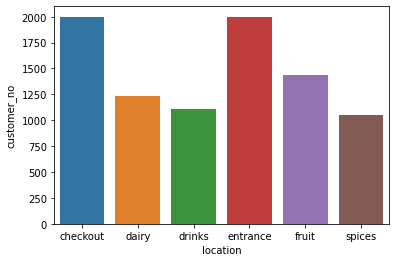

In [43]:
# plot location frequency over entire day
myf = df.groupby(['location']).count()
sns.barplot(x=myf.index, y=myf['customer_no'])


In [44]:
# create features
df['hour'] = df.index.hour
df['minute'] = df.index.minute

In [45]:
df.reset_index(drop=True,inplace=True)

In [49]:
# plot location frequency vs. hour of day
df.sort_values(by='hour', inplace=True)

fig = px.histogram(df, x='location', animation_frame="hour").update_xaxes(categoryorder ="category ascending")
fig.update_layout(yaxis_range=[0,225])

<AxesSubplot:xlabel='hour'>

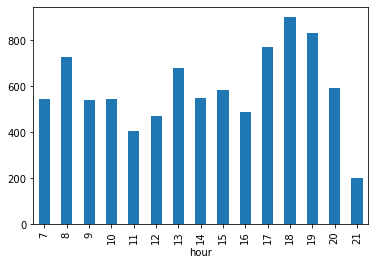

In [47]:
df.groupby(['hour']).apply('count')['customer_no'].plot(kind='bar')